In [57]:
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [39]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [42]:
deliv_time = pd.Series(data.iloc[:,0])


In [43]:
sort_time = pd.Series(data.iloc[:,1])


In [44]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

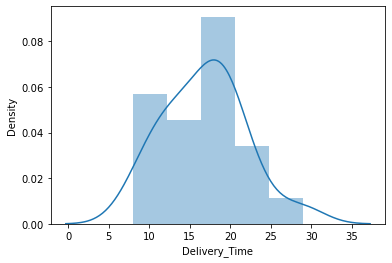

In [45]:
sns.distplot(data['Delivery_Time'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

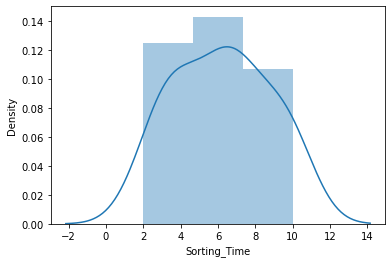

In [46]:
sns.distplot(data['Sorting_Time'])

In [47]:
model = smf.ols('Delivery_Time~Sorting_Time', data = data).fit()

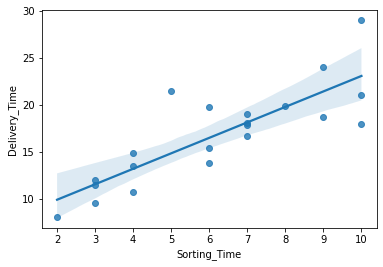

In [48]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=data);
#equation : y=B0 + B1x where y is delivery time and x is sorting time

In [50]:
#coefficeints
model.params
#B0=6.58  B1=1.65

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        19:42:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#t and p-Values
model.pvalues
#pvalue is less than 0.05 so sorting time is as significant variable

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [54]:
newdat = pd.Series([7,15,20])

In [55]:
data_pred=pd.DataFrame(newdat,columns=['Sorting_Time'])

In [56]:
model.predict(data_pred)

0    18.125873
1    31.318032
2    39.563132
dtype: float64